# Hey John

Let's get you familiar with the basics of machine learning. We will start with linear regression, fitting a straight line to a set of data points. We will start by doing it manually, then we will use a library to do it for us.

##  Linear Regression

### 1) By hand

I have written a couple of functions for you to use in this exercise, you can take a look at what they do if you want.

The first function is `plot_line`, it takes a slope `m` and an intercept `b` and plots the line `y = mx + b` on a graph.

The second function is `generate_line_with_noise`, it takes a slope `m`, an intercept `b`, a number of points to generate `n`, and a noise level `noise`. It generates `n` points on the line `y = mx + b` and adds some random noise to them. It then returns the points x, y.

Finally, there is `plot_scatter_points_with_truth_line` which wraps everything up. It takes a slope `m`, an intercept `b`, a number of points to generate `n`, and a noise level `noise`. It generates the points, plots them, and plots the line `y = mx + b` on the same graph.

Make sure to run the cell below to load the functions.

In [55]:
%pip install --user ipywidgets
from ipywidgets import interact, FloatSlider, fixed
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

def plot_line(m, b):
    ax = plt.gca()
    # Generate x values
    x = np.linspace(-10, 10, 100)
    # Compute y values according to line formula
    y = m*x+b
    # Plot the line as a dotted red line
    ax.plot(x, y, 'r--')

    # Add x and y axes
    ax.axhline(y=0, color='k', linewidth=1)
    ax.axvline(x=0, color='k', linewidth=1)
    # Show the plot
    plt.show()

def generate_line_with_noise(m, b, n=100, noise=1):
    # Generate x values
    x = np.linspace(-10, 10, n)
    # Generate y values according to line formula and add noise
    y = m*x+b+np.random.normal(0, noise, n)
    return x, y

def plot_scatter_data_with_truth_line(m, b, n=100, noise=1):
    # Generate x and y values
    x, y = generate_line_with_noise(m, b, n, noise)
    # Plot the data as blue dots
    plt.scatter(x, y, c='b')
    # Plot the line as a dotted red line
    plot_line(m, b)

You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Let's start by just doing each step in the data generating process manually. We will start by generating some data points on a line with a slope of 2 and an intercept of 5. We will generate 100 points and add a noise level of 0.5. We will then plot the points and the line.

Feel fre to change the slope, intercept, number of points, and noise level to see what happens.


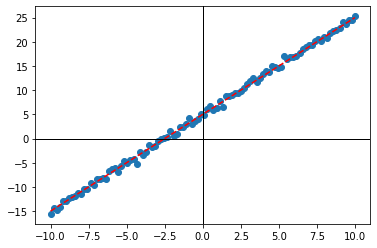

In [56]:
# Start by generating some data with a slope of 2 and a y-intercept of 5
x_data, y_data = generate_line_with_noise(m=2, b=5, n=100, noise=0.5)
# Plot the data as a scatter plot
plt.scatter(x_data, y_data)
# Plot the line
plot_line(2, 5)

Because we are in a jupyter notebook, we can use the `interact` widget to change the parameters and see what happens in realtime. Try it out! 

If you are interested in reading more about what the `interact` widget can do, check out the [documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html). Don't stress about it too much, though.

In [57]:
interact(plot_scatter_data_with_truth_line, m=FloatSlider(min=-10, max=10, step=0.5, value=2), b=FloatSlider(min=-10, max=10, step=0.5, value=5), n=fixed(100), noise=FloatSlider(min=0, max=10, step=0.5, value=1))

interactive(children=(FloatSlider(value=2.0, description='m', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

<function __main__.plot_scatter_data_with_truth_line(m, b, n=100, noise=1)>

Great! Now we have some data to play with and we want to fit a line to it. We will start by just guessing a line and seeing how good it is. We will then try to improve our guess. We can use the `interact` widget to change the slope and intercept of our guess and see how it changes.

In [58]:
#Let's start by defining a function that plots the generated data, as well as plotting our best guess line.
def plot_generated_data_and_best_guess(m_guess, b_guess):
    # Plot the data as blue dots
    plt.scatter(x_data, y_data, c='b')
    # Plot the line as a dotted red line
    plot_line(m_guess, b_guess)

# generate some data with a slope of 2.34 and a y-intercept of -0.3
x_data, y_data = generate_line_with_noise(m=2.34, b=-0.3, n=100, noise=5)


interact(plot_generated_data_and_best_guess, m_guess=FloatSlider(min=-10, max=10, step=0.01, value=2), b_guess=FloatSlider(min=-10, max=10, step=0.01, value=5))

interactive(children=(FloatSlider(value=2.0, description='m_guess', max=10.0, min=-10.0, step=0.01), FloatSlid…

<function __main__.plot_generated_data_and_best_guess(m_guess, b_guess)>

You were probably able to get a pretty good guess, but did you notice that it's hard to get it perfect, especially when you are close to the correct value? How close is close enough? How do we know when we are done? We need a way to measure how good our guess is. In machine learning, this is called a *metric* and it measures how good our model is. We will use a metric called *mean squared error* (MSE). It is defined as:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

where $n$ is the number of points, $y_i$ is the actual value of the $i$th point, and $\hat{y_i}$ is the predicted value of the $i$th point. The lower the MSE, the better the model. We will use this to measure how good our guess is. Let's write a function to calculate the MSE of a guess.

In [59]:
def mean_squared_error(y, y_hat):
    return np.mean((y - y_hat)**2) # we can replace the sum and divide by n with np.mean, the average

# now let's define a function that plots the generated data, as well as plotting our best guess line. and reports the MSE
def plot_generated_data_and_best_guess_and_report_mse(m_guess, b_guess):
    # Compute the MSE and print it
    y_hat = m_guess*x_data+b_guess
    mse = mean_squared_error(y_data, y_hat)
    plt.title("MSE: {}".format(mse))
    # Plot the data as blue dots
    plt.scatter(x_data, y_data, c='b')
    # Plot the line as a dotted red line
    plot_line(m_guess, b_guess)

interact(plot_generated_data_and_best_guess_and_report_mse, m_guess=FloatSlider(min=-10, max=10, step=0.01, value=2), b_guess=FloatSlider(min=-10, max=10, step=0.01, value=5))

interactive(children=(FloatSlider(value=2.0, description='m_guess', max=10.0, min=-10.0, step=0.01), FloatSlid…

<function __main__.plot_generated_data_and_best_guess_and_report_mse(m_guess, b_guess)>

### 2) Using a library

OK, so now we can evaluate how good our guess is numerically. This is really critical when the situation becomes more complex and we can no longer tell by eye how well we are doing. But we are still doing everything by hand. Let's use a library to do it for us. The library we will use is called `scikit-learn` and it has a function called `LinearRegression` that will do the heavy lifting for us. We will use it to fit a line to our data and see how well it does. Take a look at the documentation for `LinearRegression` [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Slope: 2.3597137016033387
Intercept: -0.965007493905169
MSE: 28.170138886510014


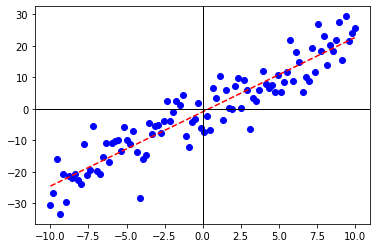

In [60]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()
# The linear regression object is an estimator. Estimators have a fit method that takes a dataset (usually X and y) and fits the model to the data.
# but first we need to reshape our data to be a matrix of n rows and 1 column fitting the pattern of n samples and m features
x_data = x_data.reshape(len(x_data), 1)
# Fit the linear regression to the data
lr.fit(x_data, y_data)
# Print the slope and y-intercept
print(f"Slope: {lr.coef_[0]}")
print(f"Intercept: {lr.intercept_}")
# Compute the mean squared error
y_hat = lr.predict(x_data)
print(f"MSE: {mean_squared_error(y_data, y_hat)}")

# plot the data and the line
plt.scatter(x_data, y_data, c='b')
plot_line(lr.coef_[0], lr.intercept_)

You may be noticing that the slope and intercept values that it finds are different from what we originally put in. This is because of the noise we added to the data. The noise makes it impossible to find the exact slope and intercept. We can see that the MSE is pretty low, so it is doing a good job of fitting the line. Got back up to the previous cell and change the noise level to see how it affects the MSE. You should see that adding more noise makes the MSE go up and the slope and intercept values get further from the true values and vice-versa for less noise.

### 3) Nonlinear fits

What happens if your data aren't just a line, but have some nonlinear component, like $y = x^2 + 2x + 5$? Let's generate some data like that and see what happens.

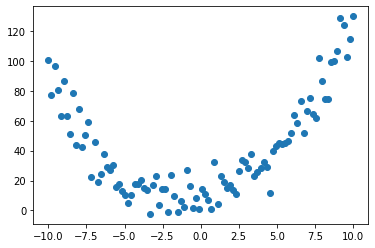

In [61]:
# First define a function to generate the data according to y = x^2 + mx + b
def generate_quadratic_data(m, b, n=100, noise=1):
    # Generate x values
    x = np.linspace(-10, 10, n)
    # Generate y values according to line formula and add noise
    y = x**2+m*x+b+np.random.normal(0, noise, n)
    return x, y

# Now let's generate some data with a quadratic relationship
x_data, y_data = generate_quadratic_data(m=2, b=5, n=100, noise=10)
# Plot the data
plt.scatter(x_data, y_data)


Definitely not a line, but lets see what happens if we try to fit a line to it.

Slope: 1.9579823635714964
Intercept: 40.67781222462521
MSE: 976.5536313426413


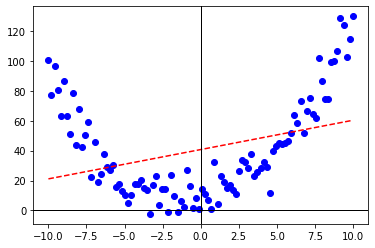

In [62]:
# Using the same linear regression object as before, we can fit a line to the data
lr.fit(x_data.reshape(len(x_data), 1), y_data)

# Print the slope and y-intercept
print(f"Slope: {lr.coef_[0]}")
print(f"Intercept: {lr.intercept_}")
# Compute the mean squared error
y_hat = lr.predict(x_data.reshape(len(x_data), 1))
print(f"MSE: {mean_squared_error(y_data, y_hat)}")

# Plot the data and the line
plt.scatter(x_data, y_data, c='b')
plot_line(lr.coef_[0], lr.intercept_)


It did the best that it could, but it's not a great fit. Kinda like fitting a square peg into a round hole. This brings up the next machine learning idea, *selecting your model*. Often, in physics especially, we know the functional form of our data: this one is quadratic, decay rates are described with an exponential, etc. In general, though, we don't know the functional form of our data. We have to try different models and see which one works best. We will talk more about this later. For now, let's try a quadratic model.

In [66]:
# let's start by hand, we should make a function that plots our model
def plot_quadratic_model(m,b):
    x = np.linspace(-10, 10, 100)
    y = x**2+m*x+b
    plt.plot(x, y, 'r--')

# Now let's define a function that plots the generated data, as well as plotting our best guess model
def plot_generated_data_and_best_guess_model_report_MSE(m_guess, b_guess):
    # Compute the MSE and print it
    y_hat = x_data**2+m_guess*x_data+b_guess
    mse = mean_squared_error(y_data, y_hat)
    plt.title("MSE: {}".format(mse))
    # Plot the data as blue dots
    plt.scatter(x_data, y_data, c='b')
    # Plot the line as a dotted red line
    plot_quadratic_model(m_guess, b_guess)

interact(plot_generated_data_and_best_guess_model_report_MSE, m_guess=FloatSlider(min=-10, max=10, step=0.01, value=5), b_guess=FloatSlider(min=-10, max=10, step=0.01, value=1))

interactive(children=(FloatSlider(value=5.0, description='m_guess', max=10.0, min=-10.0, step=0.01), FloatSlid…

<function __main__.plot_generated_data_and_best_guess_model_report_MSE(m_guess, b_guess)>

Nice! Some observations: 
1) The MSE doesn't get as small as it does in the linear fit case, this is related to the fact that the quadratic function amplifies the noise to make the error larger. 
2) It's harder to tell by eye how good the fit is. This is where the MSE comes in handy.

Now let's see a library tackle the problem. We can't use `LinearRegression` anymore, because it only fits lines. So we will jump into the really powerful stuff and introduce the machine learning framework called PyTorch. This is wayyy overkill and is a very complicated library, so don't feel bad if you don't understand it right away, but I want to intrduce it so we can use it for your project. We will use it to fit a line and a quadratic to our data and see how well it does.